# Dash
#### CS 66: Introduction to Computer Science II

# References for this lecture

Dash Tutorial: https://dash.plotly.com/

## Getting Started with Dash

__Dash__ is a Python framework for creating interactive web-based applications.
* especially useful for data-centric applications
* designed to work well with Plotly


First, install dash (as usual, replacing `python3` with the path to your Python executable)

```shell
python3 -m pip install dash
```


## Group Activity Problem 1

Copy the following code into a file called `dash_hello.py` and run it. When it runs, it should display a message like this in your terminal:

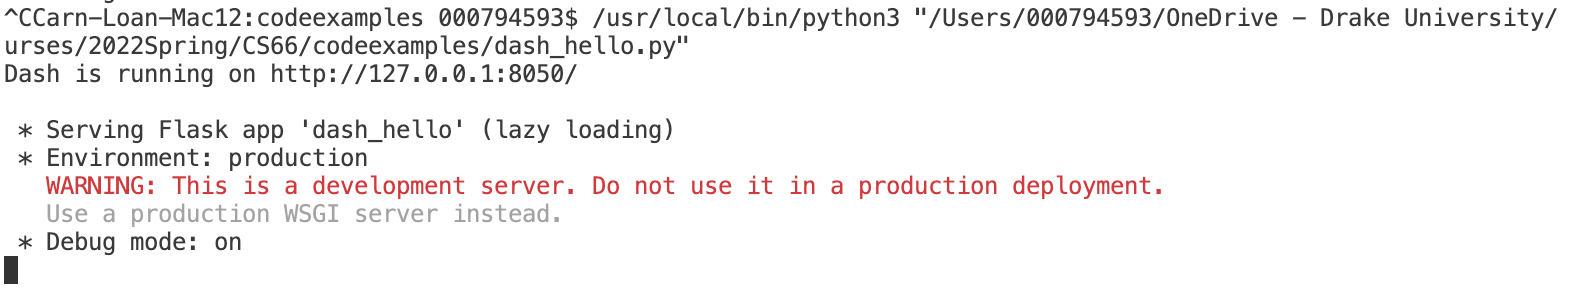

It appears that it is stuck nothing, but it is actually running a little webserver right on your computer. You can see the web page that it is generating by opening a web browser and going to http://127.0.0.1:8050/

Make sure to get this working for everyone in your group. You should all see the "Hello there!" message on the page.

Then, add a third Markdown element with a new message that you come up with.

In [ ]:
#these are the components we need from Sash
from dash import Dash, html, dcc

#this creates an object representing your application
#you should have this line for all Dash apps
app = Dash(__name__)

#the layout describes all of the pieces that display on the page
#the html.Div allows you to pass a list of things to display
app.layout = html.Div([
    dcc.Markdown(
        children = 
            """
                ## Hello there!

                This is my __Dash__ web application.

                Isn't it _neat_?

            """
    ),

    dcc.Markdown(
        children = """
                    It can have multiple markdown cells.
                    * with
                    * bullets 
                    * even
                """
    )
])

#this will launch your application in a web server
#you should have this line for all Dash apps
if __name__ == '__main__':
    app.run_server(debug=True)

#### Things to notice

Discuss the following with your group:

* Dash is capable of displaying documents written using _html_ and _Markdown_, two popular web-based formatting languages. Markdown is what is shown here - it's really basic but gets the job done. You can check out more about writing Markdown here: https://www.markdownguide.org/basic-syntax/
* Each Markdown component has a named parameter called `children` - this is where you put the text you want displayed.
* If you want to stop your Dash app, go back to the terminal, hold down your `<control>` key on your keyboard and hit the `c` key.

## Input and Callbacks

Dash has many other components besides just `Markdown`. 

The following code has an `Input` component which allows users to type into an input text box.

Notice that each component may also be given an `id` by assigning a value to the `id` parameter when creating that object. This will be useful for referring to this component in other parts of the code.

It also has a __callback__ function which is defined to run any time the value in the `Input` textbox changes.

Notice the `@app.callack` decorator which describes the inputs (i.e., parameters) and outputs (i.e., returns) of the function.

Run this along with me as we discuss how it works.

In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output

app = Dash(__name__)

app.layout = html.Div(children = [
    dcc.Markdown(
        id = "name_prompt",
        children = "## Enter your name"
    ),

    dcc.Input(
        id = "name_input",
        value = "" #initially there is no value for the user input
    ),

    dcc.Markdown(
        id = "output_message",
        children = "" #initially the Markdown string is empty
    )
])

@app.callback(
    Output("output_message","children"),
    Input("name_input","value"),
)
def my_cool_message_generator(user_name):
    my_message = "Hello "+user_name+"!"
    return my_message

if __name__ == '__main__':
    app.run_server(debug=True)

## Group Activity Problem 2

The following code introduces a new kind of component - the `Radioitem`. Run this code and discuss what it is doing with your group. Answer the following questions:

* What is a `Radioitem`?
* How many callback functions does this app have?
* What causes each of the callback functions to run? Why?
* What inputs and outputs do each callback function use?


In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output

app = Dash(__name__)

app.layout = html.Div(children = [
    dcc.Markdown(
        id = "name_prompt",
        children = "## Enter your name"
    ),

    dcc.Input(
        id = "name_input",
        value = "" #initially there is no value for the user input
    ),

    dcc.Markdown(
        id = "major_prompt",
        children = "What is your major?"
    ),

    dcc.RadioItems(
        id = "major_radio_items",
        options = ["Computer Science","Data Analytics","Artificial Intelligence","Other"],
        value = "Computer Science"
    ),

    dcc.Markdown(
        id = "name_output_message",
        children = "" #initially the Markdown string is empty
    ),

    dcc.Markdown(
        id = "major_output_message",
        children = "" #initially the Markdown string is empty
    )
])

@app.callback(
    Output("name_output_message","children"),
    Input("name_input","value"),
)
def my_cool_message_generator(user_name):
    my_message = "Hello "+user_name+"!"
    return my_message

@app.callback(
    Output("major_output_message","children"),
    Input("major_radio_items","value"),
)
def message_for_major(user_major):
    my_message = "Dash is great for "+user_major+" applications."
    return my_message

if __name__ == '__main__':
    app.run_server(debug=True)

## Group Activity Problem 3

`Dropdown` is another component that is similar to `Radioitems`. What do you think that is supposed to do differently? In the code above, change the `Radioitems` to `Dropdown` and run it.

If time, also try changing it to `Checklist`. Discuss the error messages you get and how you might fix the code to get it to work as a checklist instead of radio items.

You can find documentation and examples on how to use each of these components here:
* https://dash.plotly.com/dash-core-components/radioitems
* https://dash.plotly.com/dash-core-components/dropdown
* https://dash.plotly.com/dash-core-components/checklist

Browse through the other components on the left side of the page to get an idea of what other options you have.

## Multiple Inputs affecting the same output

You can make multiple inputs affect the same output by listing multiple `Input` objects with a single callback function.

Notice how the inputs are related to the parameters in the example below:

In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output

app = Dash(__name__)

app.layout = html.Div(children = [
    dcc.Markdown(
        id = "name_prompt",
        children = "## Enter your name"
    ),

    dcc.Input(
        id = "name_input",
        value = "" #initially there is no value for the user input
    ),

    dcc.Markdown(
        id = "major_prompt",
        children = "What is your major?"
    ),

    dcc.RadioItems(
        id = "major_radio_items",
        options = ["Computer Science","Data Analytics","Artificial Intelligence","Other"],
        value = "Computer Science"
    ),

    dcc.Markdown(
        id = "output_message",
        children = "" #initially the Markdown string is empty
    )
])

@app.callback(
    Output("output_message","children"),
    Input("name_input","value"),
    Input("major_radio_items","value"),
)
def my_cool_message_generator(user_name,user_major): #the two params come from the two Input()
    if user_name == "": #the user hasn't entered a name yet
        return ""  #so return blank for the output message
    else:
        my_message = user_name + " is learning about " + user_major 
        return my_message


if __name__ == '__main__':
    app.run_server(debug=True)

## Loading and using other data with Dash applications

Even though global variables are usually a bad idea, you can use them to retain data (so you don't have to reload from a file or Web API every time the callback function runs).

In this example `DATA` is a global variable with COVID country data we worked with previously.

In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import requests

#read the country-level data from the API
response = requests.get("https://api.covid19api.com/summary")
DATA = response.json()

app = Dash(__name__)

app.layout = html.Div(children = [
    dcc.Markdown(
        id = "country_prompt",
        children = "## Enter the name of a country"
    ),

    dcc.Input(
        id = "country_input",
        value = "" #initially there is no value for the user input
    ),

    dcc.Markdown(
        id = "output_message",
        children = "" #initially the Markdown string is empty
    )
])

@app.callback(
    Output("output_message","children"),
    Input("country_input","value"),
)
def display_covid_data(country_name):
    data_display = ""
    for curr_country in DATA["Countries"]:
        if curr_country["Country"] == country_name:
            data_display = "### "+country_name+"\n\n"
            data_display += "New confirmed cases: "+str(curr_country["NewConfirmed"])+"\n\n"
            data_display += "Total deaths: "+str(curr_country["TotalDeaths"])+"\n\n"
            data_display += "as of "+DATA["Date"]+"\n\n"

    return data_display

if __name__ == '__main__':
    app.run_server(debug=True)

## Dash + Plotly

One of the really cool things about Dash is that it is designed to work well with Plotly. 

There is a Dash component called `Graph` which expects a parameter called `figure` - you can pass that any kind of Plotly figure.

In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import requests
import plotly.express as px

#read the country-level data from the API
response = requests.get("https://api.covid19api.com/summary")
DATA = response.json()
fig = px.bar(DATA["Countries"],x="Country",y="NewConfirmed",title="New Confirmed Cases by Country")

app = Dash(__name__)

app.layout = html.Div(children = [
    dcc.Markdown(
        id = "title",
        children = "## COVID Dashboard"
    ),

    dcc.Graph(
        id = "country_bar_graph",
        figure = fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

## Group Activity Problem 4

In the previous set of notes, you made a line graph with the total COVID deaths for each state. How can we change the above code to make it work with that figure?

## Group Activity Problem 5

Now let's put it all together. Run the following code, which uses a `Dropdown` to filter out which countries to display.

Discuss the following in your groups:
* Where does it get the list of countries in the dropdown menu from?
* Why does this `Dropdown` let you select multiple values but the one we worked with above only let you select one?
* Instead of filtering by country name, what if you wanted to filter by number of cases like we did in the activities from the previous set of notes? Discuss ideas for how that could be accomplished (though you don't actually need to implement it in your code).

In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import requests
import plotly.express as px

#read the country-level data from the API
response = requests.get("https://api.covid19api.com/summary")
DATA = response.json()

#create the initial figure of all the countries 
#- this will quickly get replaced
fig = px.bar(DATA["Countries"],x="Country",y="NewConfirmed",title="New Confirmed Cases by Country")

#make a list of all the country names that appear in 
# the DATA["Countries"] list of dictionaries
country_names_list = []
for country_data in DATA["Countries"]:
    country_names_list.append(country_data["Country"])

app = Dash(__name__)

app.layout = html.Div(children = [
    dcc.Markdown(
        id = "title",
        children = "## COVID Dashboard"
    ),

    dcc.Dropdown(
        id = "country_select_dropdown",
        options = country_names_list,
        value = ["United States of America","Canada","Mexico"],
        multi = True #allows us to select multiple values
    ),

    dcc.Graph(
        id = "country_bar_graph",
        figure = fig
    )
])

@app.callback(
    Output("country_bar_graph","figure"),
    Input("country_select_dropdown","value"),
)
def update_country_graph(country_names):
    #country_names is a list with the countries
    #selected from the dropdown by the user
    records_to_display = [] #for keeping only the selected countries
    for curr_country in DATA["Countries"]: #loop through all country records
        if curr_country["Country"] in country_names:
            records_to_display.append(curr_country)
    fig = px.bar(records_to_display,x="Country",y="NewConfirmed",title="New Confirmed Cases by Country")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

## Assignment 5

This is an 8-point assignment.

In the activities from the previous set of notes, you created a line graph using the `https://api.covid19api.com/live/country/united-states` endpoint and filtered out all but three states. Create a Dash application which does something similar. It should have the following things:
* A line graph showing the total number of COVID deaths over time for states (including other regions, cruise ships, and whatever else is listed under the `"Province"` key).
* A Dropdown that allows the user to select multiple states. When the user selects a new state, the figure should update to only show the selected states.

You may also experiment and include other additional features in your application - additional visualizations, user interface components, etc.

Put your code in a `.py` file and submit it to codePost under __Assignment 5: COVID Dashboard__. There is no automated testing of this assignment.

## Optional: Publicly deploy your app

If you are interested in deploying you Dash apps publicly, there is a free hosting service called Heroku that you can use. The following guide walks you through how to set it up: https://dash.plotly.com/deployment (scroll to the __Heroku for Sharing Public Dash apps for Free__ section).

Note that this requires you to install the `virtualenv` package for Python

```shell
python3 -m pip install virtualenv
```

as well as `git` which you can get here: https://git-scm.com/book/en/v2/Getting-Started-Installing-Git